# Forest Fire, R Data Visualization
Forest fires can create ecological problems and endanger human lives and property. Understanding when they occur and what causes them is important for managing them. Conduct explanatory analyses on the data to better understand it.

Here are descriptions of the variables in the data set and the range of values for each taken from the paper:

- X: X-axis spatial coordinate within the Montesinho park map: 1 to 9
- Y: Y-axis spatial coordinate within the Montesinho park map: 2 to 9
- month: Month of the year: 'jan' to 'dec'
- day: Day of the week: 'mon' to 'sun'
- FFMC: Fine Fuel Moisture Code index from the FWI system: 18.7 to 96.20
- DMC: Duff Moisture Code index from the FWI system: 1.1 to 291.3
- DC: Drought Code index from the FWI system: 7.9 to 860.6
- ISI: Initial Spread Index from the FWI system: 0.0 to 56.10
- temp: Temperature in Celsius degrees: 2.2 to 33.30
- RH: Relative humidity in percentage: 15.0 to 100
- wind: Wind speed in km/h: 0.40 to 9.40
- rain: Outside rain in mm/m2 : 0.0 to 6.4
- area: The burned area of the forest (in ha): 0.00 to 1090.84

The X and Y variables are coordinates of fire locations. The acronym FWI stands for "fire weather index", a method used by scientists to quantify risk factors for forest fires.

In [1]:
library(readr)
library(ggplot2)
library(dplyr)
library(purrr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
#read in file
fires <- read.csv("forestfires.csv")
head(fires)

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


In [4]:
#group fires by month
fires_month <- fires %>%
  group_by(month) %>%
  summarize(total_fires = n())
fires_month

month,total_fires
apr,9
aug,184
dec,9
feb,20
jan,2
jul,32
jun,17
mar,54
may,2
nov,1


To have the bar chart sort in chronological order, I am creating a factor to control the correct order so the graph makes tense on a time sequence.

In [5]:
#create month factor to get right order of months
fires$month <-factor(fires$month, 
                       levels = c("jan", "feb", "mar", "apr", "may", "jun",
                                  "jul", "aug", "sep", "oct", "nov", "dec"))

## Bar Chart - Number of Forest Fires per Month

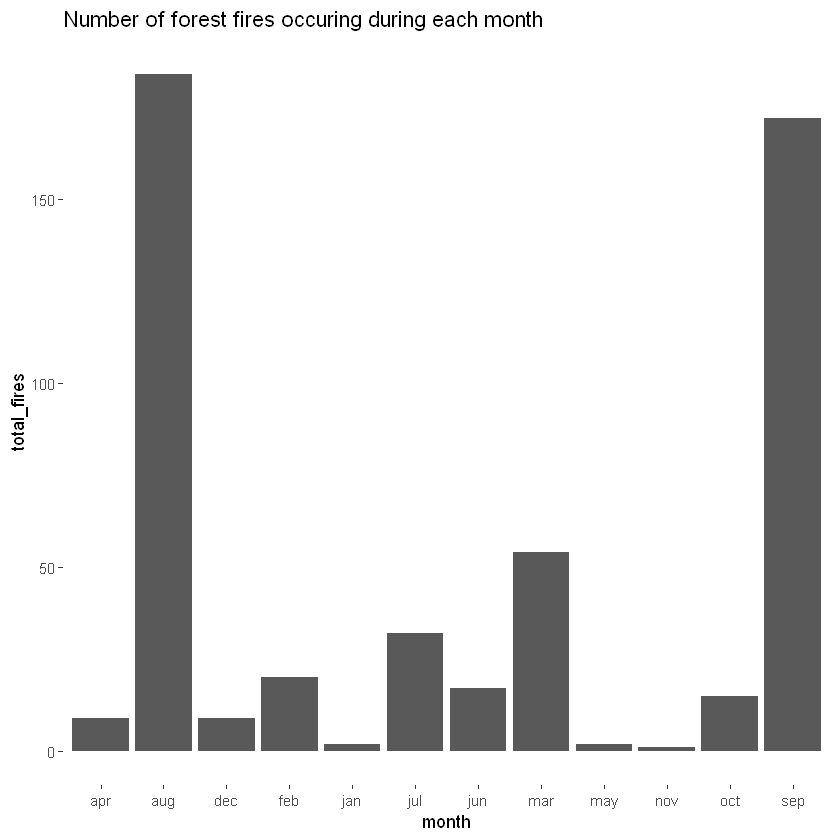

In [6]:
#create bar chart for number of forest fires per month
ggplot(data = fires_month) +
  aes(x = month, y = total_fires) +
  geom_bar(stat="identity") +
  theme(panel.background = element_rect(fill="white"))+
  labs(title="Number of forest fires occuring during each month")

It's clear that August and September, late summer months in the Northern hemisphere, see more forest fires than other months.



In [7]:
#group fires by day of the week
fires_day <- fires %>%
  group_by(day) %>%
  summarize(total_fires = n())
fires_day

day,total_fires
fri,85
mon,74
sat,84
sun,95
thu,61
tue,64
wed,54


To have the bar chart sort in chronological order, I am creating a factor to control the correct order so the graph makes tense on a time sequence.

In [8]:
#create day factor to get right order of days
fires$day <-factor(fires$day, 
                   levels = c("mon","tue","wed",
                              "thu","fri","sat","sun"))

# Bar Chart - Number of Forest Fires per Day

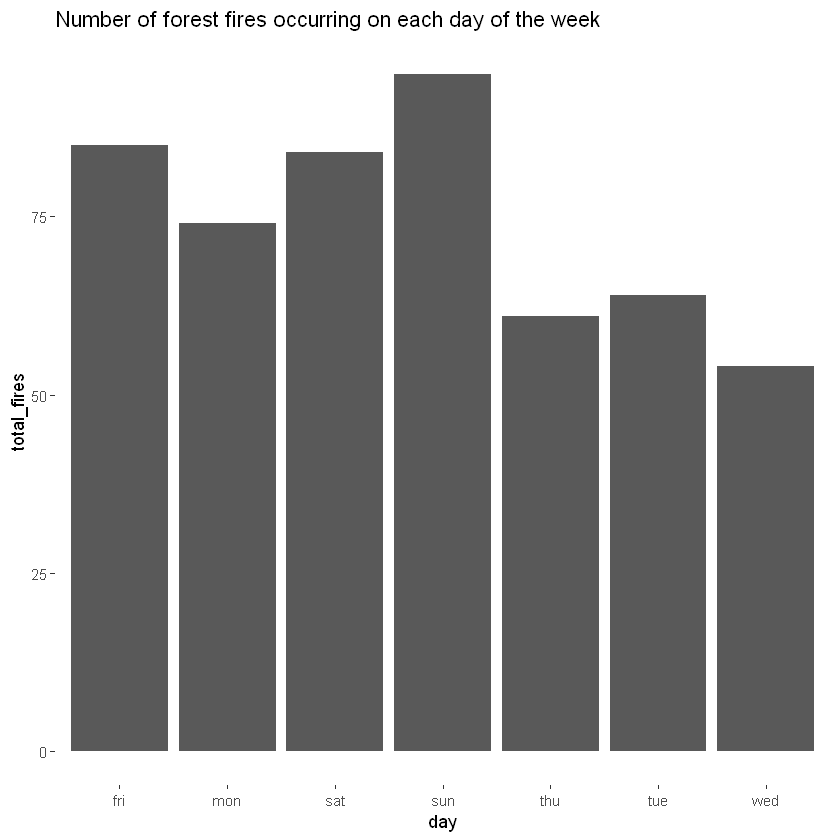

In [9]:
# create bar chart for number of fires per day of the week
ggplot(data = fires_day) +
  aes(x = day, y = total_fires) +
  geom_bar(stat="identity") +
  theme(panel.background = element_rect(fill = "white")) +
  labs(title = "Number of forest fires occurring on each day of the week")

It also looks as though Friday, Saturday, and Sunday have more forest fires than days in the middle of the week.

To explore causes of the temporal patterns of forest fire occurrence the bar charts reveal, we can look more closely at how the variables that relate to forest fires vary by month and by day of the week.

Create box plots to visualize the distribution of the following variables by month and by day of the week:

1. FFMC
2. DMC
3. DC
4. ISI
5. temp
6. RH
7. wind
8. rain

# Boxplot function

In [10]:
#Write a function to create box plots for several variables
create_boxplots <- function(x,y) {
  ggplot(fires) +
  aes_string(x= x, y=y) +
  geom_boxplot()+
  theme(panel.background = element_rect(fill = "white")) +
  labs(title=y)
}

In [11]:
#Assign X and Y variable names
x_var_month <- names(fires)[3] # names for the months
x_var_days <- names(fires)[4] # names for the days
y_var <- names(fires)[5:12] # names for all columns to be used for boxplots

## Day Boxplots - map2()

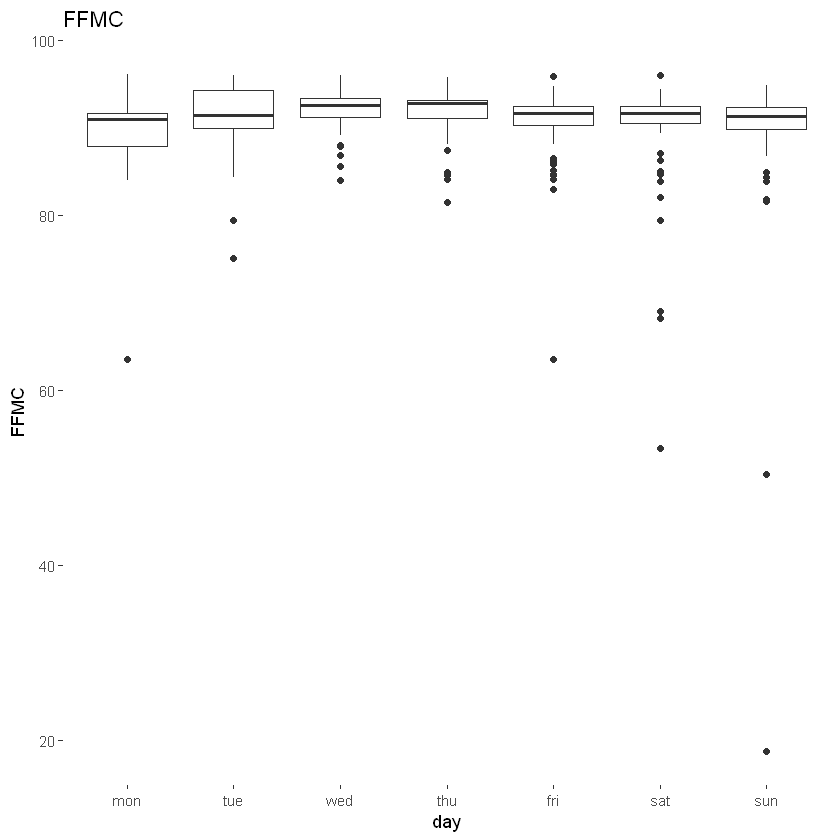

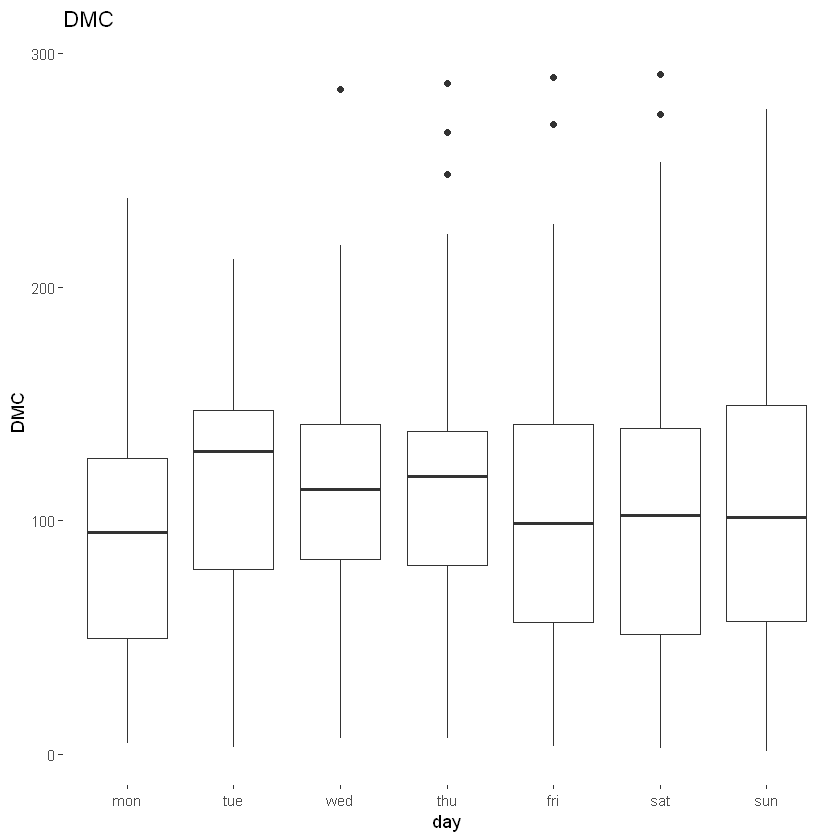

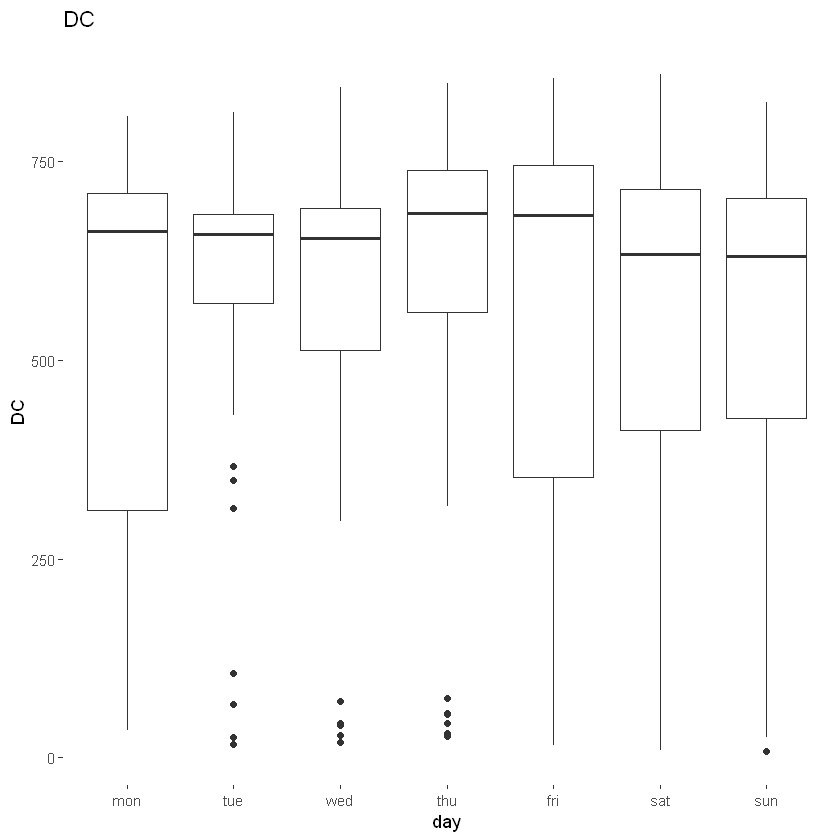

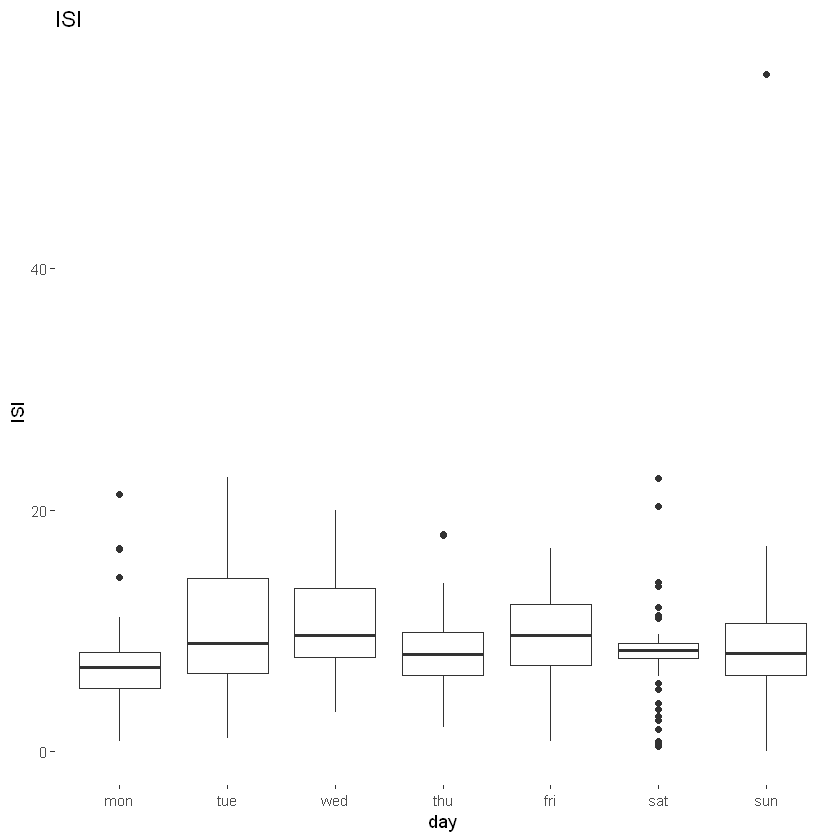

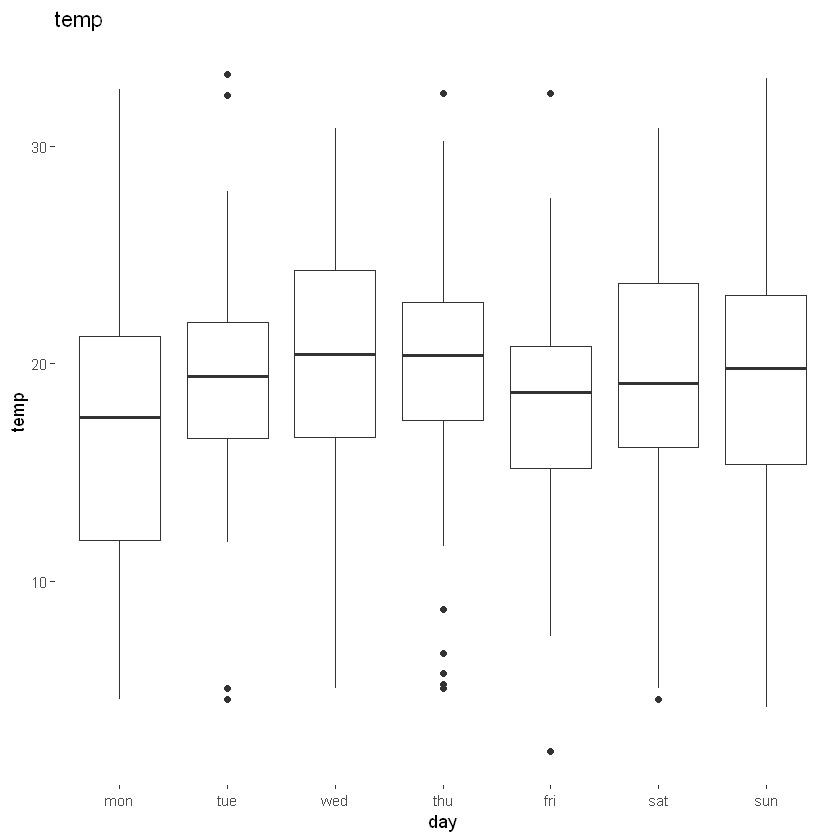

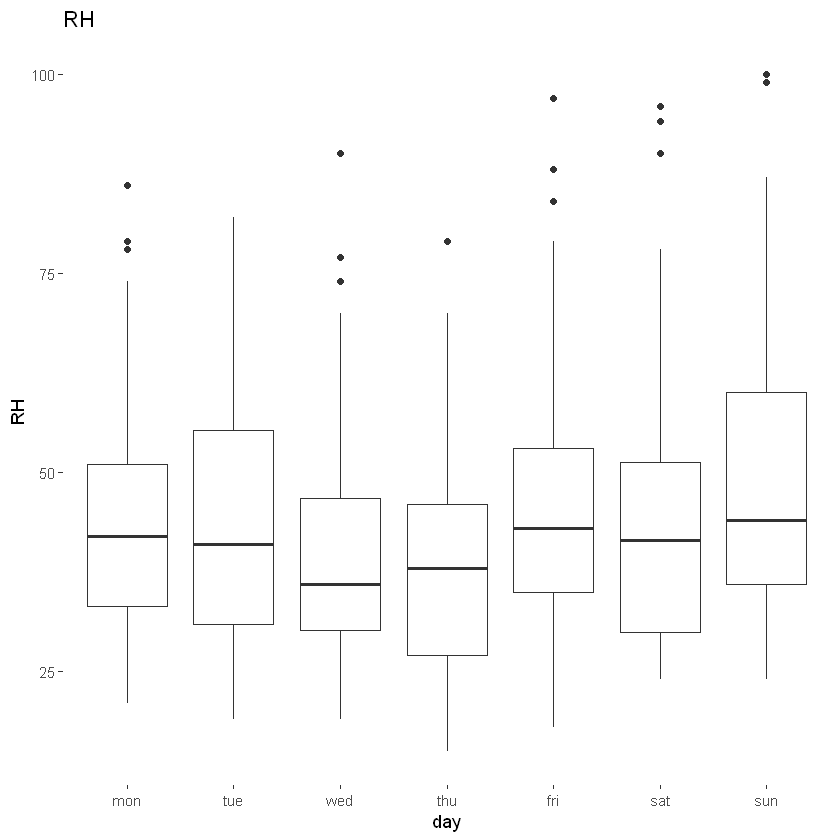

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]


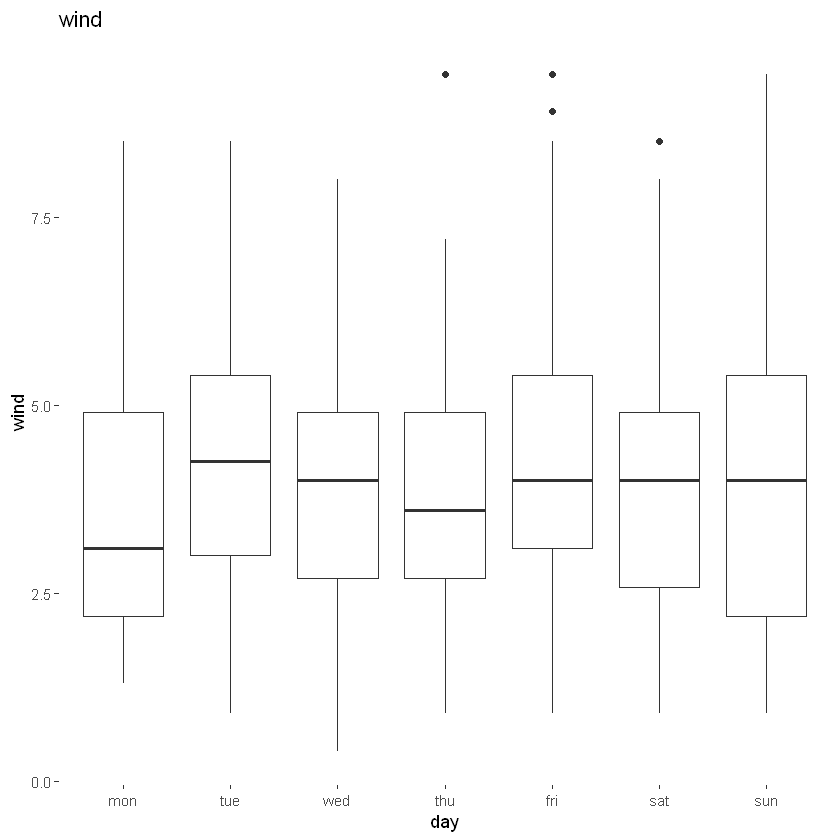

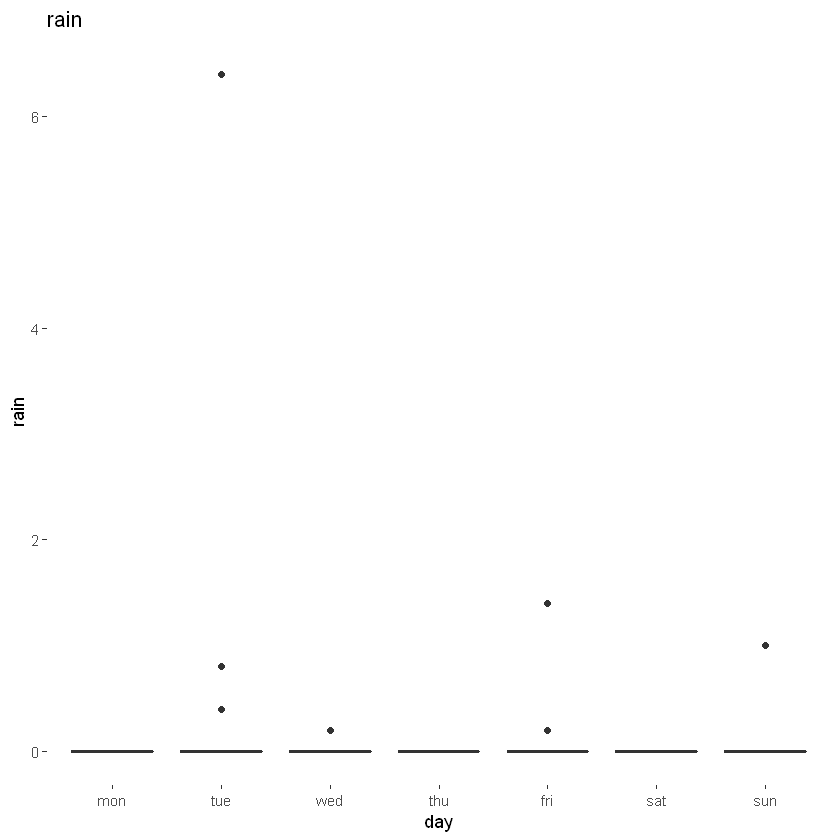

In [13]:
#day_boxplots

day_boxplots <- map2(x_var_days, y_var, create_boxplots)
day_boxplots

First, it's clear from looking at the solid black lines in the centers of the box plots that medians for each variable seem to be quite consistent across days of the week. The size of the boxes are also consistent across days, suggesting that the ranges of data values are similar.

The number of outlier points and the length of the box whiskers representing high and low points vary from day to day. However, there do not seem to be any patterns that suggest that the variables differ by day of the week, despite the fact that the number of forest fires appears to be higher on weekends.

It's interesting to look at plot of the the rain variable. A few very high values make it so the y-axis range is large enough to make the rest of the data appear to be close to zero.

## Month Boxplot - map2()

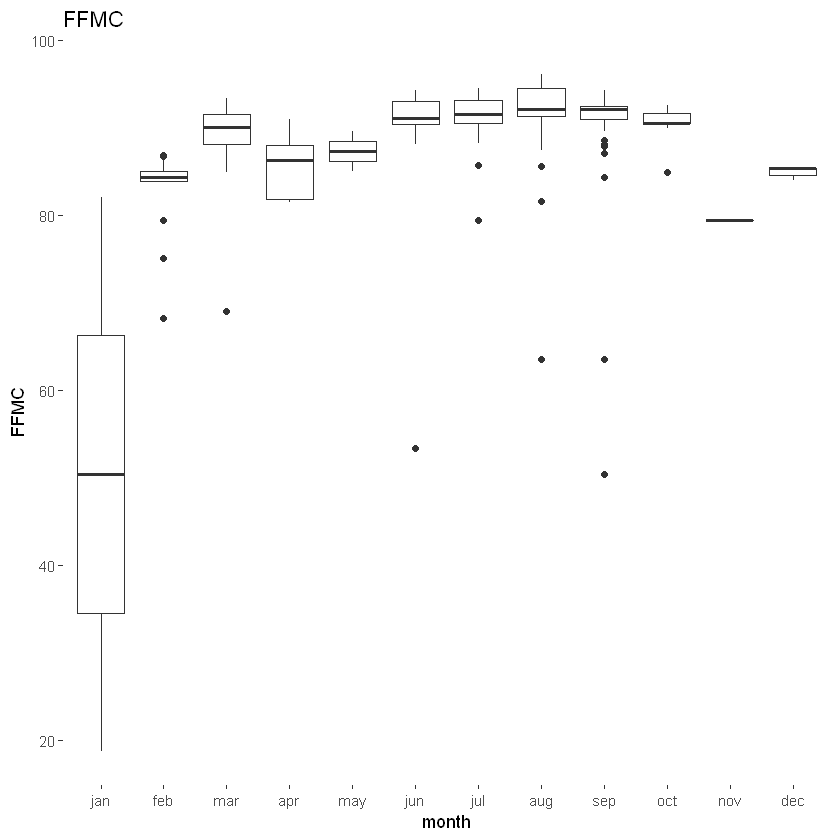

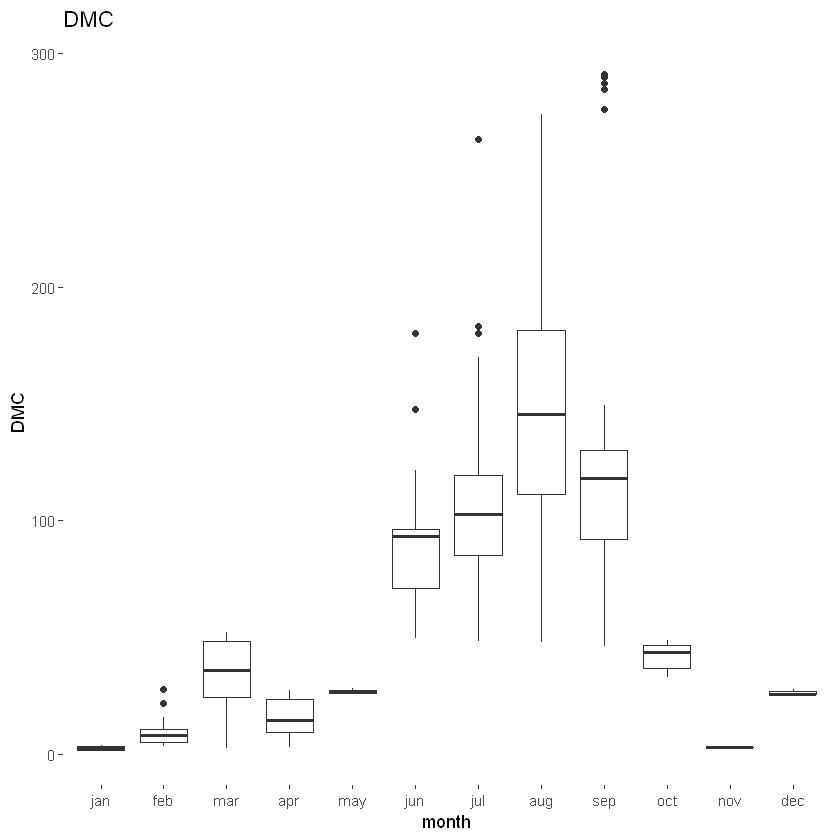

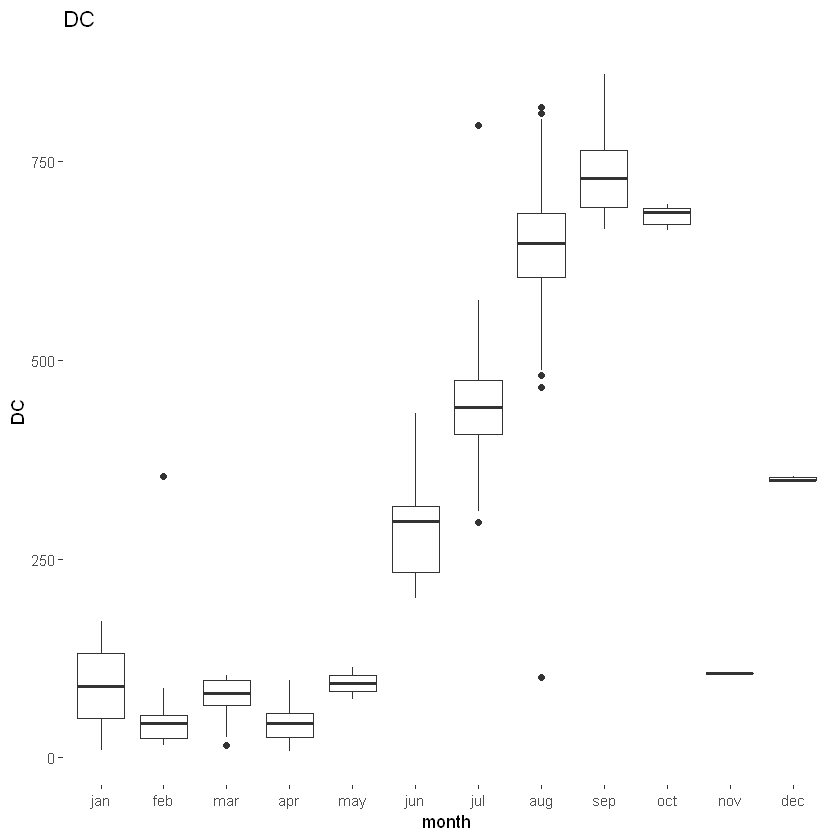

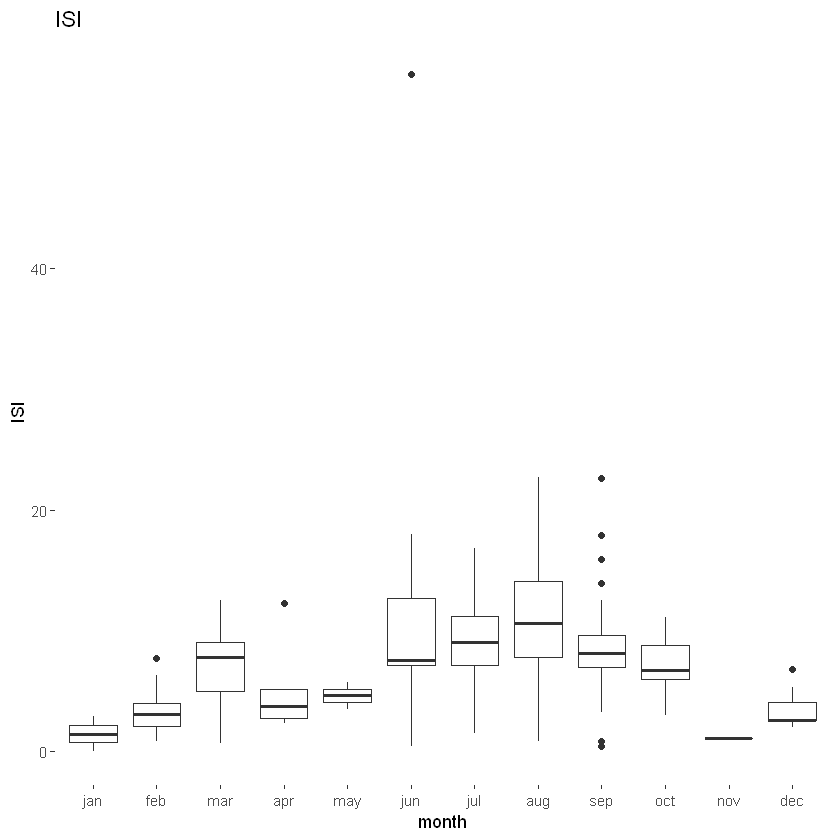

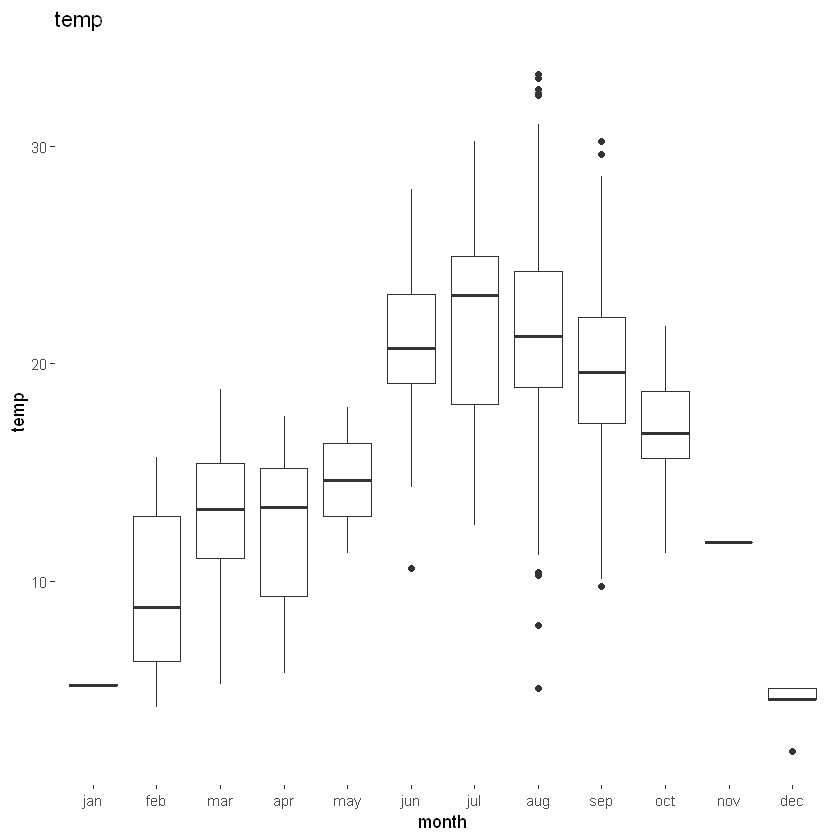

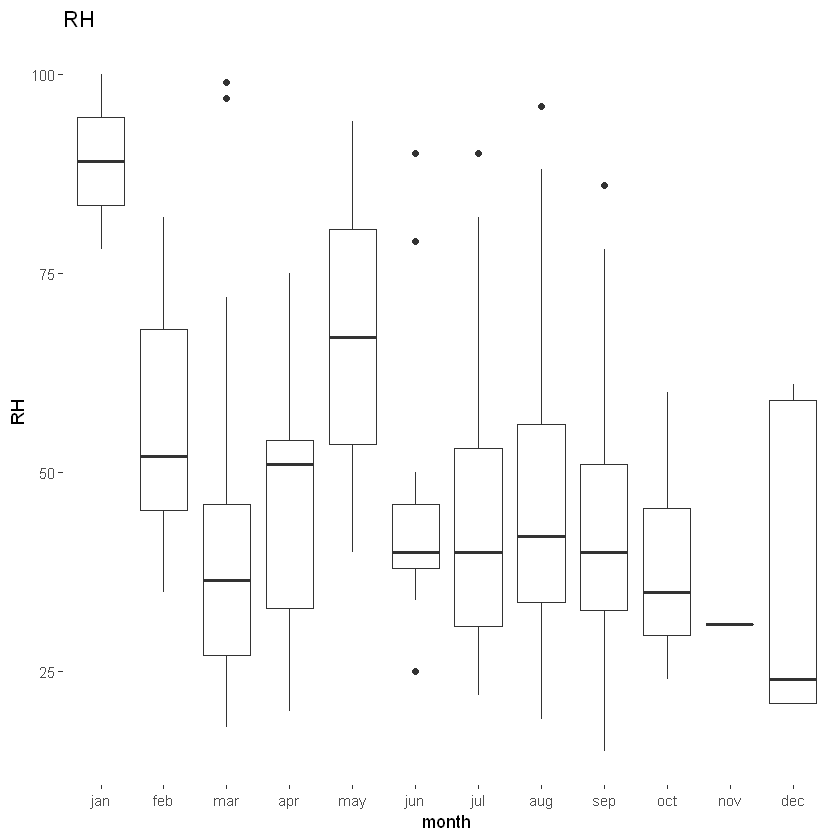

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]


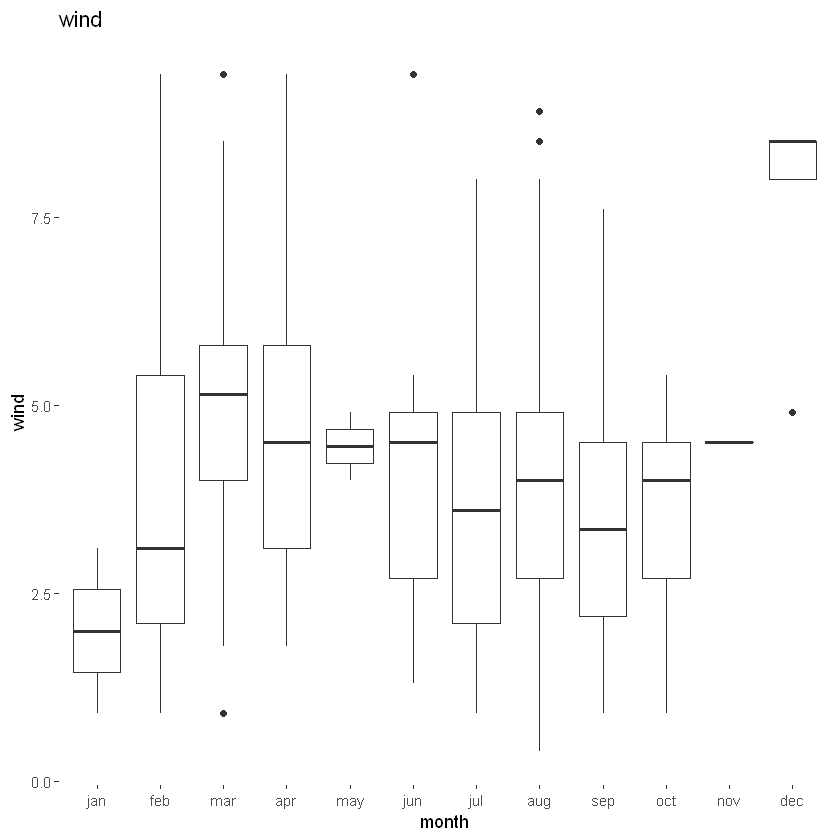

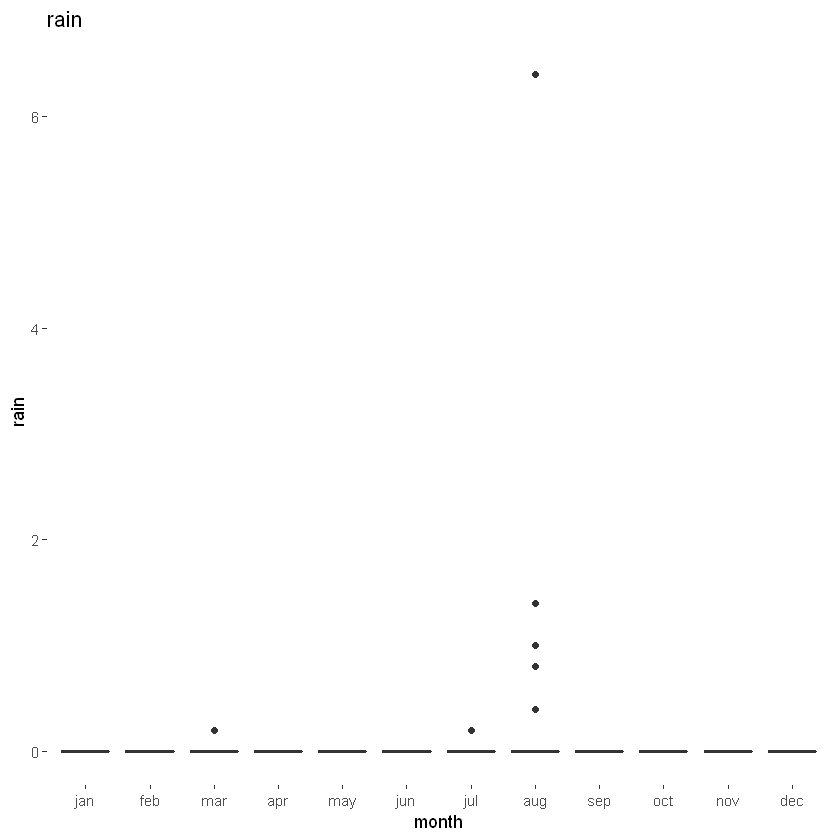

In [14]:
#month_boxplots

month_boxplots <- map2(x_var_month, y_var, create_boxplots)
month_boxplots

Unlike the variable distributions by days of the week, almost all the variables display clear differences among months.

The temp variable shows a pattern of being higher during the summer months. We can also see that the DC variable, which stands for "drought code" and is a measure of how dry conditions are, is high during the late summer months. Do these variables' patterns make sense when you consider the months when fires are most common?

We've looked at patterns of variable distributions across months and days of the week. While variables don't seem to show interesting patterns when viewed by day of the week, there are interesting differences among months that look like they have the potential to explain why more forest fires occur in the late summer months.

# Scatter Plots

Next, create scatter plots to see what can be learned about relationships between the area burned by a forest fire and the following variables:

- FFMC: Fine Fuel Moisture Code index from the FWI system: 18.7 to 96.20
- DMC: Duff Moisture Code index from the FWI system: 1.1 to 291.3
- DC: Drought Code index from the FWI system: 7.9 to 860.6
- ISI: Initial Spread Index from the FWI system: 0.0 to 56.10
- temp: Temperature in Celsius degrees: 2.2 to 33.30
- RH: Relative humidity in percentage: 15.0 to 100
- wind: Wind speed in km/h: 0.40 to 9.40
- rain: Outside rain in mm/m2 : 0.0 to 6.4

We are interested in whether the variables above may affect forest fire area. For that reason, we will place area on the y-axes and the other variables on the x-axes of your scatter plots.

In [15]:
# creat scatter plots to learn about relationships between the area burned and the other variables

create_scatter <- function(x,y) {
  ggplot(fires) +
  aes_string(x=x, y=y) +
  geom_point()+
  theme(panel.background = element_rect(fill = "white")) +
  labs(title=y)
}

x_var_scatter <- names(fires)[5:12] # names for the days
y_var_scatter <- names(fires)[13] # names for all columns to be used for boxplots

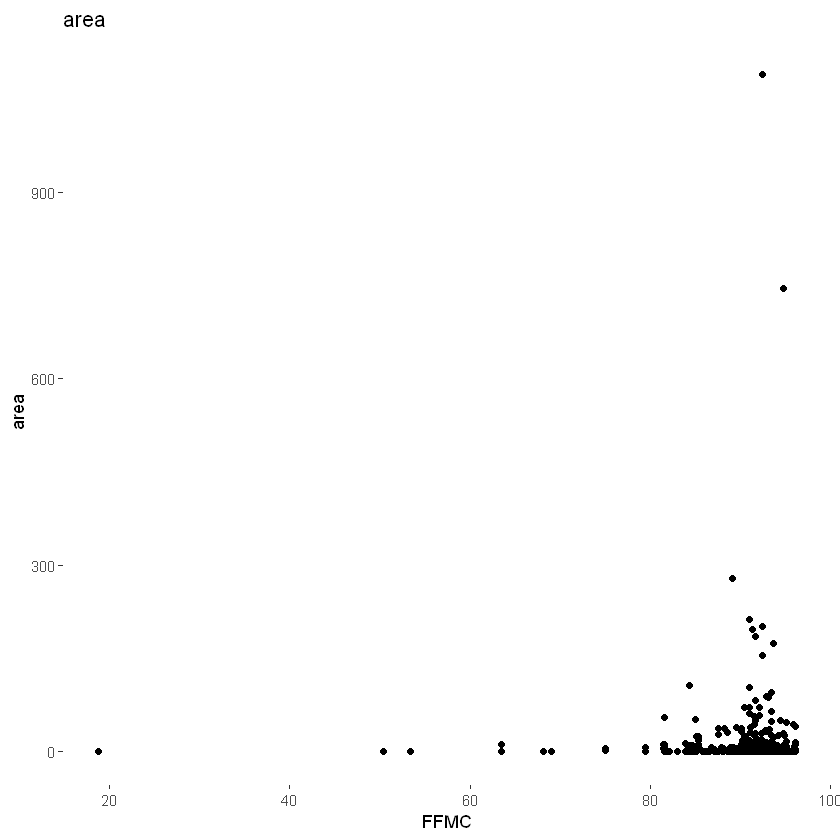

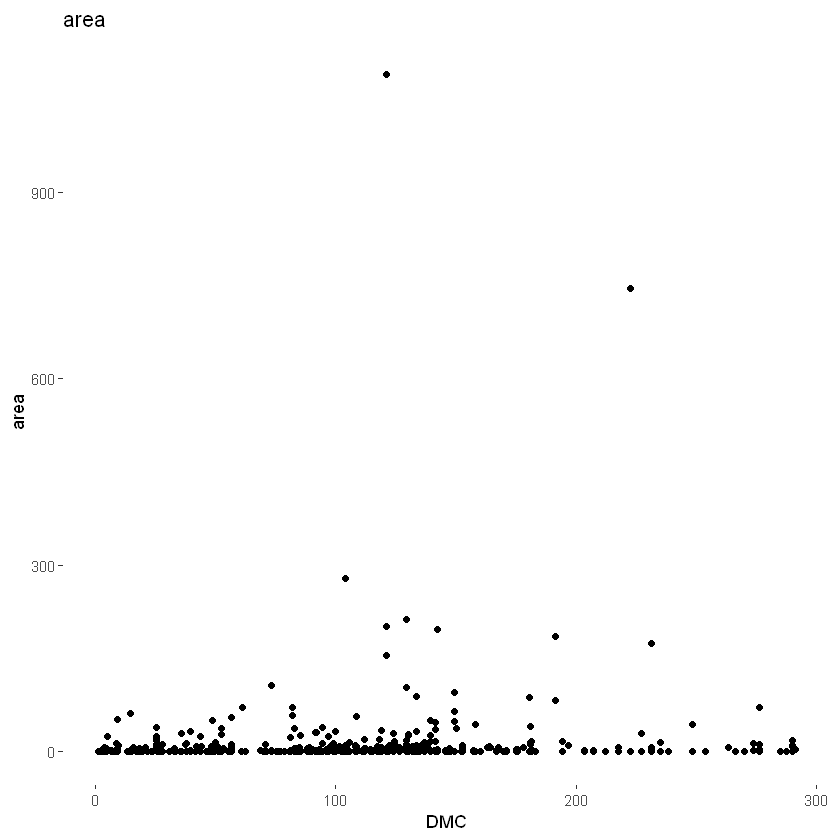

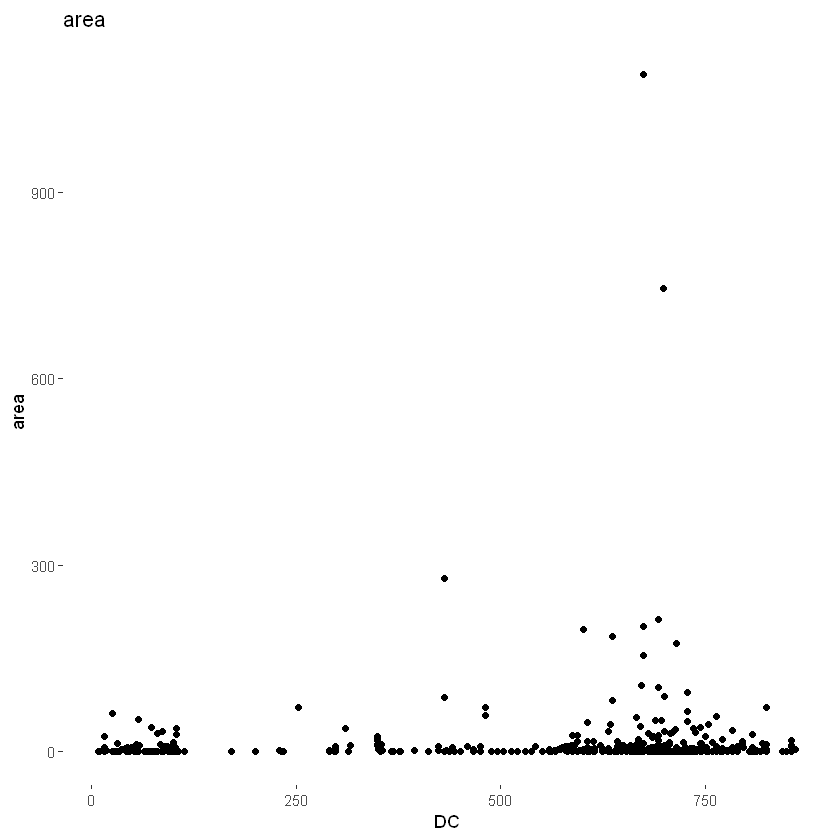

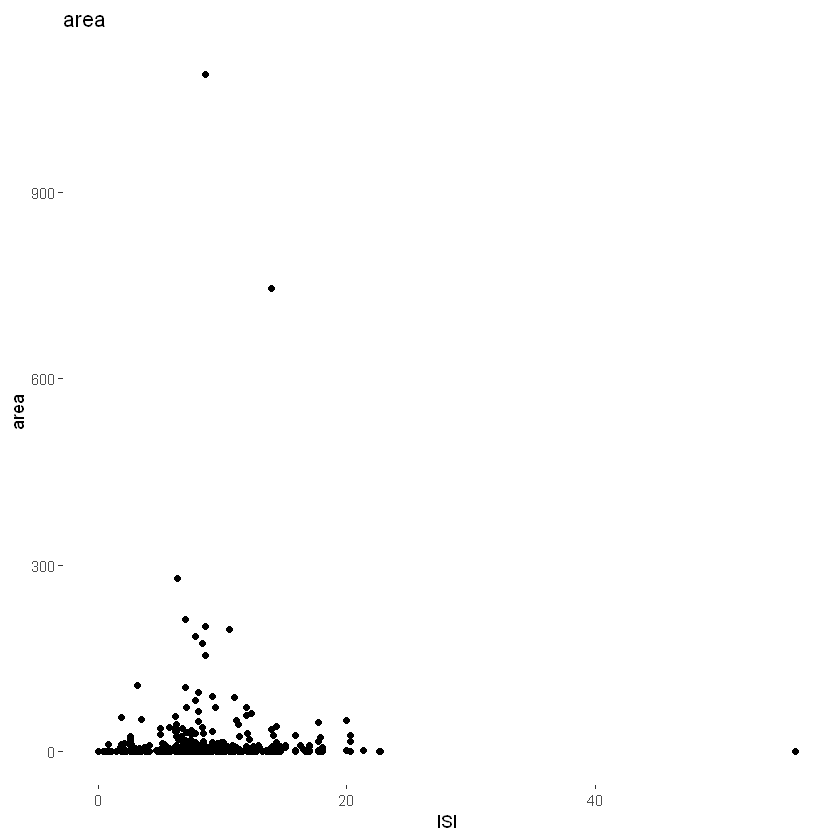

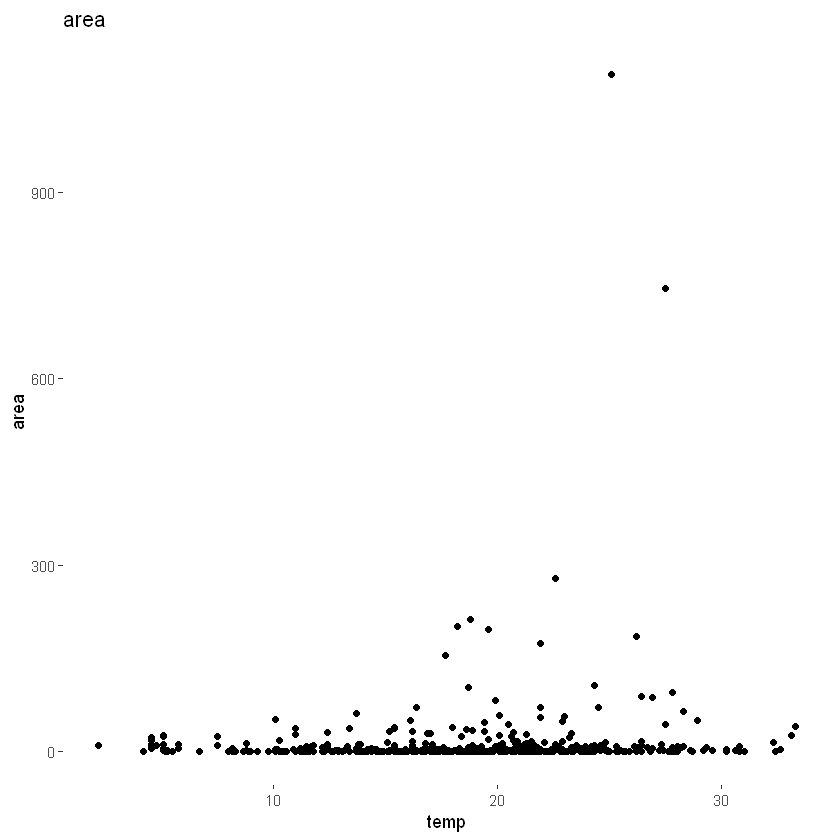

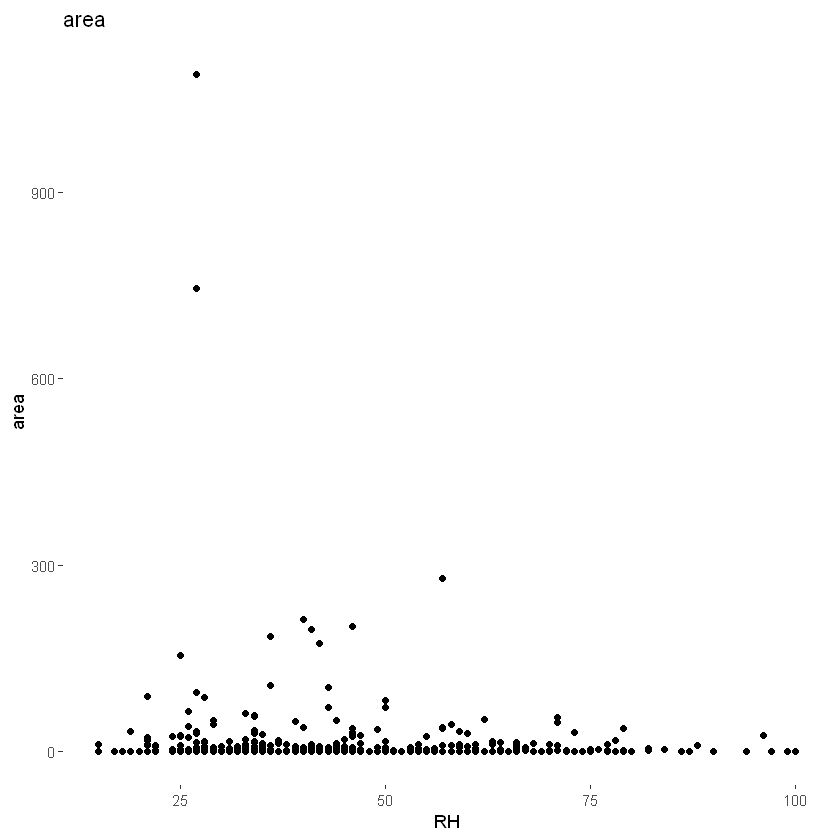

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]


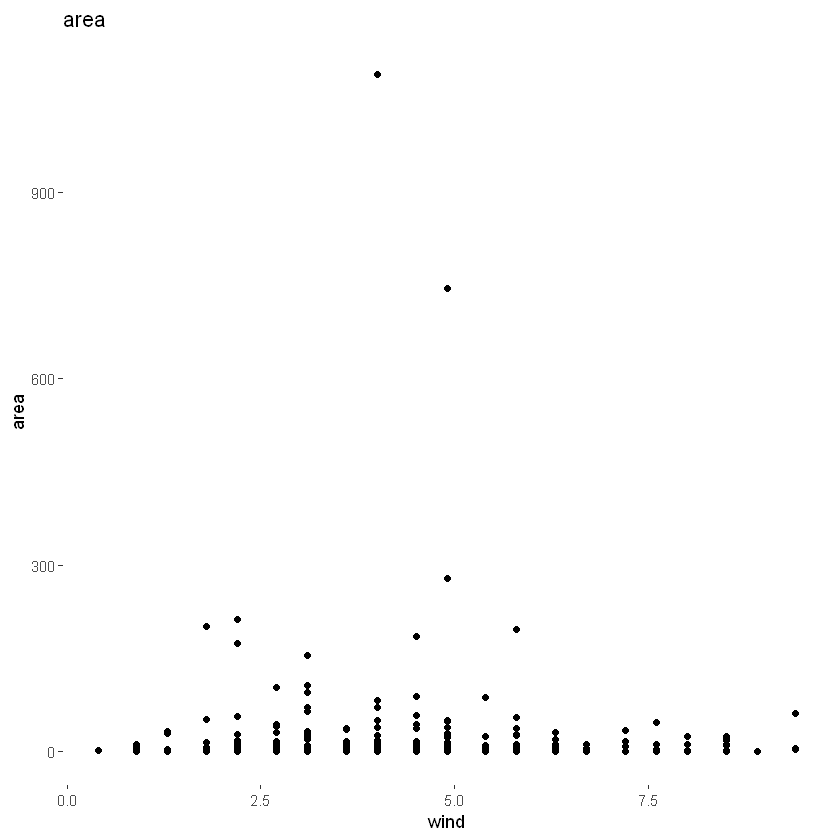

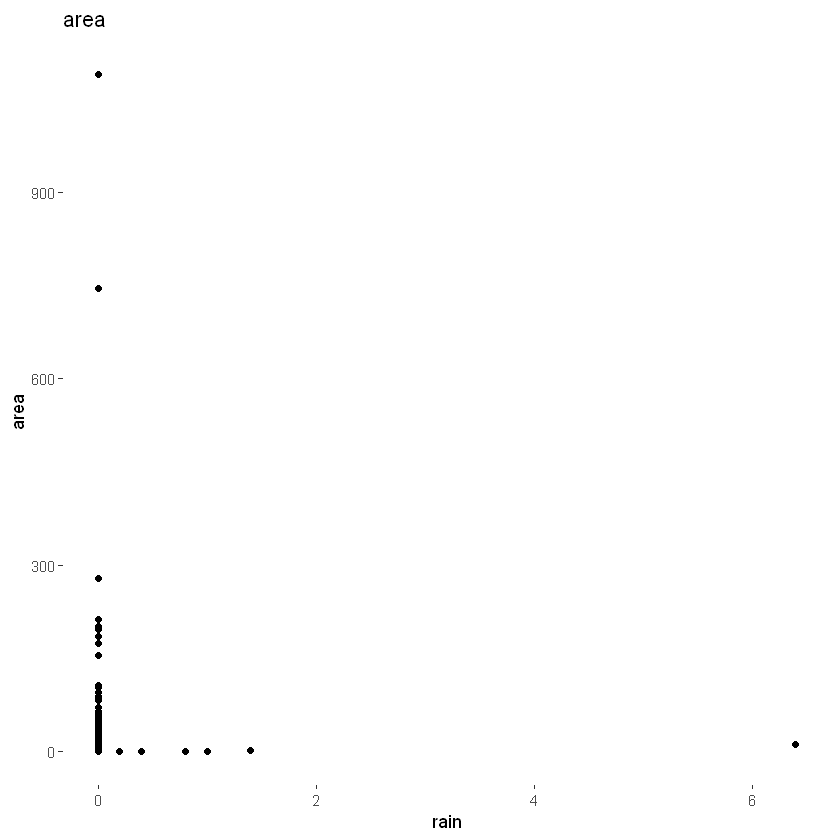

In [16]:
#use map2() on the scatter

scatter_plots <- map2(x_var_scatter, y_var_scatter,create_scatter)
scatter_plots

It's hard to understand relationships between variables when you look at these plots. There are a few points representing very large values of area, and many points representing values of area that are zero or close to zero. As a result, most points are clustered around the bottom of the plots.